In [144]:
#import dependencies 
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from collections import Counter
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.preprocessing import MinMaxScaler, Imputer
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import linear_model
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
KFold

from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

In [145]:
#import data
training = pd.read_csv("training dataset.csv", sep=',') 
scoring = pd.read_csv("scoring dataset.csv", sep=',') 

C:\Users\Johnny\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


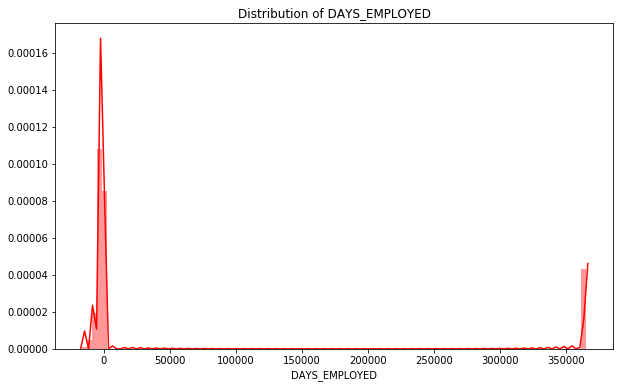

In [146]:
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(scoring[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()   

plot_distribution('DAYS_EMPLOYED','red')

In [147]:
#nans
non_na = training.apply(lambda x: x.count(), axis=0)

#list non nas per column
non_na = non_na.to_frame().reset_index()

#list of columns with less than 40000 complete values
non_na
non_na.sort_values(by = [0], axis=0, ascending=True)

test = (non_na[0] < 30000)
non_na_sub = non_na[test]

#list of columns with missing data
missing_val_cols = non_na_sub["index"]
missing_val_cols = list(missing_val_cols)

#drop columns with missing values
training = training.drop(columns = missing_val_cols, axis = 0)

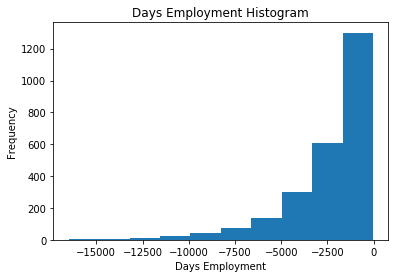

In [148]:
# Create an anomalous flag column
scoring['DAYS_EMPLOYED_ANOM'] = scoring["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
scoring['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

scoring['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

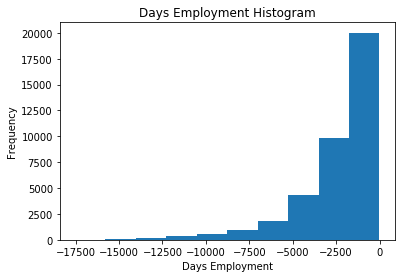

In [149]:
# Create an anomalous flag column
training['DAYS_EMPLOYED_ANOM'] = training["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
training['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

training['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [150]:
#drop_na
training = training.dropna()

#drop ID col
training = training.drop('SK_ID_CURR', axis=1)
training = training.drop('DAYS_EMPLOYED_ANOM', axis=1)
scoring = scoring.drop('DAYS_EMPLOYED_ANOM', axis=1)

In [151]:
#match training and test columns
train_columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

scoring = scoring[train_columns]

In [152]:
#select important features
important_features_train = ['TARGET',
 'EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'DAYS_EMPLOYED',
 'DAYS_BIRTH',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_ANNUITY',
 'AMT_CREDIT',
 'DAYS_REGISTRATION',
 'REGION_POPULATION_RELATIVE',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'HOUR_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'OCCUPATION_TYPE',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'WEEKDAY_APPR_PROCESS_START',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'NAME_FAMILY_STATUS',
 'CNT_FAM_MEMBERS',
 'NAME_EDUCATION_TYPE',
 'NAME_INCOME_TYPE',
 'CODE_GENDER',
 'CNT_CHILDREN',
 'REGION_RATING_CLIENT_W_CITY',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'REGION_RATING_CLIENT',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'FLAG_OWN_CAR',]

important_features_scoring = ['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'DAYS_EMPLOYED',
 'DAYS_BIRTH',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_ANNUITY',
 'AMT_CREDIT',
 'DAYS_REGISTRATION',
 'REGION_POPULATION_RELATIVE',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'HOUR_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'OCCUPATION_TYPE',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'WEEKDAY_APPR_PROCESS_START',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'NAME_FAMILY_STATUS',
 'CNT_FAM_MEMBERS',
 'NAME_EDUCATION_TYPE',
 'NAME_INCOME_TYPE',
 'CODE_GENDER',
 'CNT_CHILDREN',
 'REGION_RATING_CLIENT_W_CITY',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'REGION_RATING_CLIENT',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'FLAG_OWN_CAR',]

In [153]:
#subset columns
training = training[important_features_train]
scoring = scoring[important_features_scoring]

Random under-sampling:
1    2150
0    2150
Name: TARGET, dtype: int64


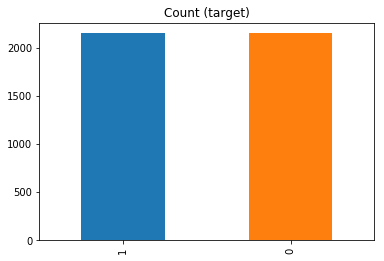

In [154]:
#undersampling

#class counts
count_class_0, count_class_1 = training.TARGET.value_counts()


# Divide by class
df_class_0 = training[training['TARGET'] == 0]
df_class_1 = training[training['TARGET'] == 1]

#undersample dataframe

df_class_0_under = df_class_0.sample(count_class_1)
training_undersampled = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(training_undersampled.TARGET.value_counts())

training_undersampled.TARGET.value_counts().plot(kind='bar', title='Count (target)');
# training_undersampled.TARGET.value_counts().plot(kind='bar', title='Count (target)');

In [155]:
#numerical and categorical variables 

all_cols = training_undersampled.columns

num_cols = training_undersampled._get_numeric_data().columns

print("Numerical columns: ", num_cols)

cat_cols = list(set(all_cols) -  set(num_cols))
print("Categorical columns: ",cat_cols)

#categorical to numeric
le = LabelEncoder()
for i in cat_cols:
    training_undersampled[i] = le.fit_transform(training_undersampled[i])

Numerical columns:  Index(['TARGET', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'DAYS_EMPLOYED', 'DAYS_BIRTH',
       'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'AMT_ANNUITY',
       'AMT_CREDIT', 'DAYS_REGISTRATION', 'REGION_POPULATION_RELATIVE',
       'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'HOUR_APPR_PROCESS_START',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN',
       'REGION_RATING_CLIENT_W_CITY', 'AMT_REQ_CREDIT_BUREAU_MON',
       'REGION_RATING_CLIENT', 'AMT_REQ_CREDIT_BUREAU_QRT'],
      dtype='object')
Categorical columns:  ['WEEKDAY_APPR_PROCESS_START', 'NAME_FAMILY_STATUS', 'ORGANIZATION_TYPE', 'CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'FLAG_OWN_CAR']


In [156]:
# Remove 'id' and 'target' columns
labels = training_undersampled.columns[1:]

X = training_undersampled[labels]
y = training_undersampled['TARGET']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [157]:
# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Repeat with the scaler
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\Johnny\Anaconda4\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [92]:
#simple logistic regression model

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))

C:\Users\Johnny\Anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train/Test split results:
LogisticRegression accuracy is 0.909


In [60]:
# Running it through a number of times

for i in range(1,10):
    
    a = i / 100
    lasso_again = linear_model.SGDClassifier(penalty='l1', alpha=a, l1_ratio=1)
    lasso_again.fit(X_train, y_train)

    print("alpha = ", a, " teration # ", i)
    y2_pred_lasso_again = lasso_again.predict(X_test)

    ridge_again =linear_model.SGDClassifier(penalty='l2', alpha=a, l1_ratio=0)
    ridge_again.fit(X_train, y_train)

    elastic_net =linear_model.SGDClassifier(penalty='l1', alpha=a, l1_ratio=0.5)
    elastic_net.fit(X_train, y_train)

    
    y2_pred_lasso_again = lasso_again.predict(X_test)
    y2_pred_ridge_again = ridge_again.predict(X_test)
    y2_pred_elastic_net = elastic_net.predict(X_test)
    print('Accuracy of Lasso   classifier on test set: {:.2f}'.format(lasso_again.score(X_test, y_test)))
    print('Accuracy of Ridge classifier on test set: {:.2f}'.format(ridge_again.score(X_test, y_test)))
    print('Accuracy of Eastic Net classifier on test set: {:.2f}'.format(elastic_net.score(X_test, y_test)))

C:\Users\Johnny\Anaconda4\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Johnny\Anaconda4\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Johnny\Anaconda4\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_it

alpha =  0.01  teration #  1
Accuracy of Lasso   classifier on test set: 0.68
Accuracy of Ridge classifier on test set: 0.67
Accuracy of Eastic Net classifier on test set: 0.67
alpha =  0.02  teration #  2
Accuracy of Lasso   classifier on test set: 0.67
Accuracy of Ridge classifier on test set: 0.68
Accuracy of Eastic Net classifier on test set: 0.68
alpha =  0.03  teration #  3
Accuracy of Lasso   classifier on test set: 0.67
Accuracy of Ridge classifier on test set: 0.67
Accuracy of Eastic Net classifier on test set: 0.67
alpha =  0.04  teration #  4
Accuracy of Lasso   classifier on test set: 0.67
Accuracy of Ridge classifier on test set: 0.67
Accuracy of Eastic Net classifier on test set: 0.66
alpha =  0.05  teration #  5
Accuracy of Lasso   classifier on test set: 0.65
Accuracy of Ridge classifier on test set: 0.67
Accuracy of Eastic Net classifier on test set: 0.66
alpha =  0.06  teration #  6
Accuracy of Lasso   classifier on test set: 0.66
Accuracy of Ridge classifier on test 

C:\Users\Johnny\Anaconda4\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Johnny\Anaconda4\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Johnny\Anaconda4\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_it

In [93]:
#first model
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


precision, recall, fscore, support = score(y_test, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

Accuracy: 90.93%
precision: [0.90999011 0.33333333]
recall: [0.99913119 0.00437637]
fscore: [0.95247955 0.00863931]
support: [4604  457]


In [94]:
# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

# Train on the training data
random_forest.fit(X_train, y_train)

# Feature names
features = list(X.columns)

# Make predictions on the test data
predictions = random_forest.predict_proba(X_test)[:, 1]

#accuracy 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

precision, recall, fscore, support = score(y_test, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.8s


Accuracy: 90.93%
precision: [0.90999011 0.33333333]
recall: [0.99913119 0.00437637]
fscore: [0.95247955 0.00863931]
support: [4604  457]


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [95]:
grad_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)


# xgboost classifier
xg_clf = xgb.XGBClassifier(objective = 'binary:logistic', n_estimates = 200).fit(X_train, y_train)


train_gb_score = grad_clf.score(X_train, y_train)
test_gb_score = grad_clf.score(X_test, y_test)
train_xgb_score = xg_clf.score(X_train, y_train)
test_xgb_score = xg_clf.score(X_test, y_test)

print("Accuracy score of Gradient Boosting classifier for training set")
print("{:2.4f}".format(train_gb_score))
print("Accuracy score of Gradient Boosting classifier for test set")
print("{:2.4f}".format(test_gb_score))

print("----------------------------------------------------------------")

print("Accuracy score of XGBoost classifier for training set")
print("{:2.4f}".format(train_xgb_score))
print("Accuracy score of XGBoost classifier for testset")
print("{:2.4f}".format(test_xgb_score))

Accuracy score of Gradient Boosting classifier for training set
0.9179
Accuracy score of Gradient Boosting classifier for test set
0.9097
----------------------------------------------------------------
Accuracy score of XGBoost classifier for training set
0.9172
Accuracy score of XGBoost classifier for testset
0.9093


In [33]:
test_dmatrix = xgb.DMatrix(data = X_train, label = y_train)

params = {"objective": "binary:logistic", "max_depth": 5}

cv_results = xgb.cv(dtrain = test_dmatrix, params = params, nfold = 5, num_boost_round = 50, metrics= "error", verbose_eval = None)

print(cv_results)

[13:00:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[13:00:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[13:00:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[13:00:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[13:00:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[13:00:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[13:00:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

In [63]:
# Random search: random draws of hyperparameter combinations a set number of times

from sklearn.model_selection import RandomizedSearchCV
test_dmatrix = xgb.DMatrix(data = X_train, label = y_train)

param_grid = {'gamma':[1,5,10],
              'reg_lambda':[1,5,10], 
              'learning_rate':np.arange(0.05, 1.05, 0.05) ,
             'n_estimators':[25,50,100],
             'subsample': np.arange(0.05, 1.05, 0.05)}

gbm = xgb.XGBClassifier(objective = 'binary:logistic')
grid_score = RandomizedSearchCV(estimator = gbm, param_distributions= param_grid, n_iter = 25)
grid_score.fit(X_train,y_train)

print(grid_score.best_params_)
print(grid_score.best_score_)

C:\Users\Johnny\Anaconda4\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'subsample': 0.55, 'reg_lambda': 5, 'n_estimators': 50, 'learning_rate': 0.15000000000000002, 'gamma': 1}
0.6773255813953488


In [158]:
train_data=lgb.Dataset(X_train, label = y_train)
valid_data=lgb.Dataset(X_test, label = y_test)